In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('Salary Dataset.csv')
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [2]:
df['monthly'] = df.Salary.str.extract('(/mo)') # /mo if present, otherwise NaN
df['annual'] =df.Salary.str.extract('(/yr)') # /yr if present, otherwise NaN

In [3]:
df[['monthly', 'annual']] = pd.get_dummies(df[['monthly', 'annual']])

In [4]:
df['Salary_num'] = df.Salary.str.extract('([0-9,.]+)').replace(",", "") 
df['Salary_num'] = df['Salary_num'].str.replace(",", "").astype(int)# Just numerical Salary

In [5]:
df['Final Salary Num'] = (df['monthly']*12 + df['annual'])*df['Salary_num'] # Usuable data over consistent basis

In [6]:
df = df.drop(columns = 'Salary_num')
df = df.dropna(axis = 0)


In [7]:
df.groupby(['Company Name', 'Job Title']).mean()['Final Salary Num']

Company Name     Job Title                
& Other Stories  Data Scientist                722247.0
---              Data Scientist                120000.0
159 Solutions    Data Analyst                  828777.0
1mg              Data Scientist                991426.0
20K Group        Data Analyst                   42892.0
                                                ...    
vitrana          Data Scientist               1000000.0
wayForward       Machine Learning Engineer     845183.0
yellow.ai        Data Engineer                 763571.0
                 Data Scientist                410994.0
Águas Guariroba  Data Analyst                  666792.0
Name: Final Salary Num, Length: 3365, dtype: float64

In [8]:
companies = df.groupby(['Company Name']).count().count()[0]
jobs = df.groupby(['Job Title']).count().count()[0]

In [9]:
jobs # This is low enough that a chart may show this well

25

In [10]:
companies # We cannot break this down in a way that will be useful in bulk

2528

Do people making more money have a specific job Title

C:\Users\0416935\AppData\Local\Temp/ipykernel_19060/2589025011.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels= job_sal.index.tolist(),rotation=90);


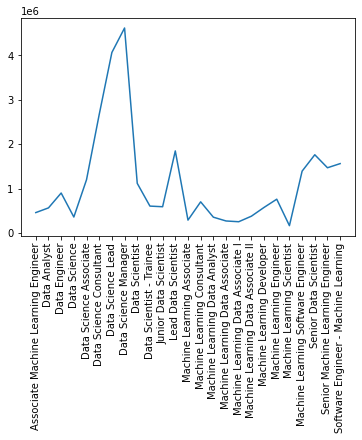

In [11]:
job_sal = df.groupby(['Job Title']).mean()['Final Salary Num']
fig, ax = plt.subplots()
ax.plot(job_sal.index.tolist(), job_sal.values.tolist());
plt.gca();
ax.set_xticklabels(labels= job_sal.index.tolist(),rotation=90);

If we look more closely at the above plot, we can see a clear divide in the type of Job Titles - Data Science and Machine Learning (Even If we know that the title and the projects of the employees may overlap). And it appears that the Data Science team of Job Titles are earning more than the machine learning side. Therefore, if you are able to do both types of job title groups, it appears more favorable to enter into a data science field than a strictly machine learning field 

# Make a linear model to show how catagorical values impact Salary

Just focus on Data Scientist Info

In [12]:
df_ds = df[df['Job Title'] == 'Data Scientist']

In [13]:
X_ds = df[['Company Name', 'Salaries Reported', 'Location']]
X_loc_ds = pd.get_dummies(X_ds['Location'])
y_ds = df['Final Salary Num']

X_train, X_test, y_train, y_test = train_test_split(X_loc_ds ,y_ds,test_size = 0.3, random_state = 42)

lm_model = LinearRegression(normalize = True)
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)

rsquared_score = r2_score(y_test, y_test_preds)
rsquared_score

0.006871246513129314

You cannot determine the Salary of a data Scientist solely off of country.
    How about based on Company?

In [14]:
X_comp_ds = pd.get_dummies(X_ds['Company Name'])
X_train, X_test, y_train, y_test = train_test_split(X_comp_ds ,y_ds,test_size = 0.3, random_state = 42)

lm_model = LinearRegression(normalize = True)
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)

rsquared_score = r2_score(y_test, y_test_preds)
rsquared_score

-3.500612884603465e+30

This shows even less valuable information in predicting salary. Clearly other underlying factors are not being addressed. We should move to more basic statistics to answer our questions. Our most basic statistal information we can pull is what countries' average salaries are for a Data Scientist.

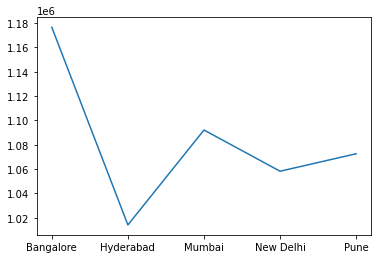

In [15]:
job_sal = df_ds.groupby(['Location']).mean()['Final Salary Num']
fig, ax = plt.subplots()
ax.plot(job_sal.index.tolist(), job_sal.values.tolist());

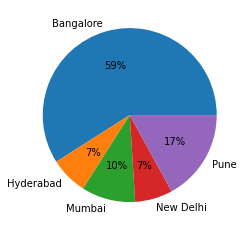

In [16]:
comps_high_sal = df_ds.nlargest(n = 100, columns = ['Final Salary Num']).groupby(['Location']).count()['Final Salary Num']
plt.pie(comps_high_sal, labels = comps_high_sal.index.tolist(), autopct = '%1.f%%');

C:\Users\0416935\AppData\Local\Temp/ipykernel_19060/1749652559.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels= job_sal.index.tolist(),rotation=90);


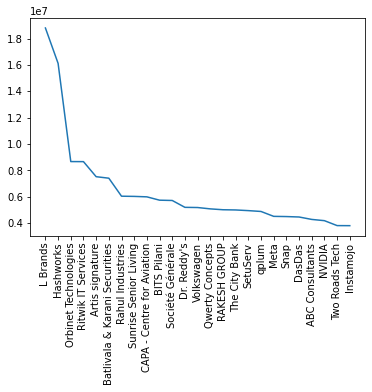

In [17]:
job_sal = df_ds.groupby(['Company Name']).mean()['Final Salary Num'].nlargest(n = 25)
fig, ax = plt.subplots()
ax.plot(job_sal.index.tolist(), job_sal.values.tolist());
plt.gca();
ax.set_xticklabels(labels= job_sal.index.tolist(),rotation=90);

Where are the highest reported salaries located? 

So we have learned that if you are breaking into this field and strictly want to earn as high of a salary as possible, you should choose a Data Science job title over a Machine Learning job title. Additionally, we have determined a set of companies with the highest salaries for Data Scientists. If we would like to go to the extreme of job placemetn for salary, we should also move to Bangalore of the countries listed, as this country as the most jobs with salary in the top 100 of Data Scientist salaries reported here.